## Applied Machine Learning:
    Assignment 03
    Sai Lakshmi Nikitha Akarapu
    SXA210112

Seoul Bike Sharing Demand:

Data Set Information:
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.


Attribute Information:
Date : year-month-day
Rented Bike count - Count of bikes rented at each hour
Hour - Hour of he day
Temperature-Temperature in Celsius
Humidity - %
Windspeed - m/s
Visibility - 10m
Dew point temperature - Celsius
Solar radiation - MJ/m2
Rainfall - mm
Snowfall - cm
Seasons - Winter, Spring, Summer, Autumn
Holiday - Holiday/No holiday
Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
import statistics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from IPython.display import Image  
from sklearn import tree
from os import system
import os
import glob

## 1. Data Import:
Import the given datasets. Explore shape and size.

In [90]:
Dataset = pd.read_csv("SeoulBikeData.csv", encoding = 'unicode_escape')

In [91]:
Dataset.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [92]:
Dataset.shape

(8760, 14)

Number of rows and columns in the dataframe is 8760 and 14 respectively.

In [93]:
Dataset.size

122640

The size of dataframe is 122640 which is equivalent to total number of rows*columns

In [94]:
Dataset['Snowfall (cm)'].unique()

array([0. , 0.1, 0.3, 0.4, 0.2, 1. , 0.9, 0.8, 0.7, 0.6, 2.7, 4. , 4.1,
       4.3, 3.9, 3.1, 2.1, 1.4, 0.5, 1.3, 1.8, 2. , 4.8, 5.1, 5. , 4.2,
       3.2, 2.6, 2.5, 2.3, 2.2, 1.9, 1.7, 1.6, 2.4, 1.2, 1.1, 3. , 3.3,
       3.5, 3.4, 2.8, 1.5, 3.8, 3.7, 7.1, 8.8, 7. , 6. , 3.6, 2.9])

In [95]:
Dataset['Snowfall (cm)'].unique()

array([0. , 0.1, 0.3, 0.4, 0.2, 1. , 0.9, 0.8, 0.7, 0.6, 2.7, 4. , 4.1,
       4.3, 3.9, 3.1, 2.1, 1.4, 0.5, 1.3, 1.8, 2. , 4.8, 5.1, 5. , 4.2,
       3.2, 2.6, 2.5, 2.3, 2.2, 1.9, 1.7, 1.6, 2.4, 1.2, 1.1, 3. , 3.3,
       3.5, 3.4, 2.8, 1.5, 3.8, 3.7, 7.1, 8.8, 7. , 6. , 3.6, 2.9])

## 2. Data Preparation tasks:

Handling Missing values

Convert categorical variables to continuous using functional knowledge

And Drop attribute/s if required


In [96]:
# Explore data types
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [97]:
# Missing Values
Dataset.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

From the above output, we can conclude that there are no missing values in the dataset.

In [98]:
Dataset.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

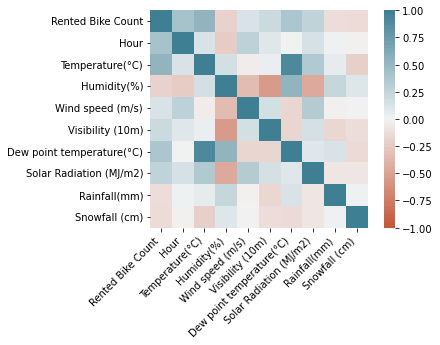

In [99]:
corr = Dataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

<AxesSubplot:xlabel='Date', ylabel='Dew point temperature(°C)'>

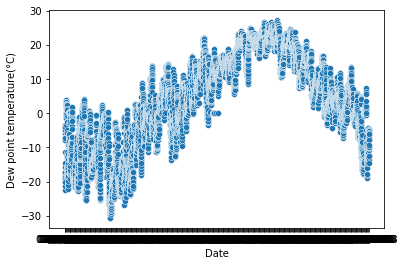

In [100]:
sns.scatterplot(x='Date', y='Dew point temperature(°C)', data=Dataset, palette='Blues_d')

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

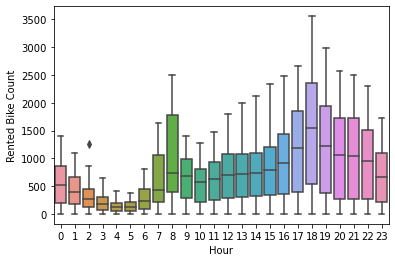

In [101]:
sns.boxplot(x = 'Hour', y = 'Rented Bike Count', data = Dataset)

## Data Cleaning:
Converting categories to dummies

In [102]:
# Automate categorical vs numerical variables separation
Summary=Dataset.describe().T
Conti=Summary.index
Column_name=Dataset.columns
All=[]
for i in range(len(Conti)):
    for j in range(len(Column_name)):
        if Conti[i]!=Column_name[j]:
            All.append(Column_name[j])
Categorical=list(set(All)-set(Conti))
Continuous=list(set(All)-set(Categorical))
print("Continuous Variables:",Continuous)
print("\nCategorical variables found in the dataset:\n",Categorical)

Continuous Variables: ['Rainfall(mm)', 'Solar Radiation (MJ/m2)', 'Visibility (10m)', 'Wind speed (m/s)', 'Hour', 'Temperature(°C)', 'Dew point temperature(°C)', 'Humidity(%)', 'Snowfall (cm)', 'Rented Bike Count']

Categorical variables found in the dataset:
 ['Holiday', 'Date', 'Seasons', 'Functioning Day']


In [103]:
pd.unique(Dataset.Seasons)

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [104]:
Dataset['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [105]:
pd.unique(Dataset.Holiday)

array(['No Holiday', 'Holiday'], dtype=object)

Coverting date to year, month, day colums

In [106]:
import datetime
Dataset['Date'] = pd.to_datetime(Dataset['Date'], format='%d/%m/%Y').dt.strftime('%m/%d/%Y')
Dataset['Year'] = pd.DatetimeIndex(Dataset['Date']).year
Dataset['Month'] = pd.DatetimeIndex(Dataset['Date']).month
Dataset['Day'] = pd.DatetimeIndex(Dataset['Date']).day

In [107]:
Dataset['Date']=pd.to_datetime(Dataset['Date'])
Dataset['WeekDay']=Dataset['Date'].dt.day_name()
mapping_dictDay={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
Dataset['WeekDayEncoding']=Dataset['WeekDay'].map(mapping_dictDay)

In [108]:
Dataset.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  Year  Month  Day WeekDay  WeekDayEncoding  
0             Yes  2017     12    1  Friday                5  
1             Yes  2017     12    1  Friday                5  
2             Yes  2017     12    1  Friday                5  
3             Yes  2017     12    1  Friday                5  
4             Yes  2017     12    1  Friday                5

In [109]:
Dataset = Dataset.drop('WeekDay', axis =1)

In [110]:
Dataset = Dataset.drop('Date',axis=1)

In [111]:
Dataset.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  Year  \
0           0.0            0.0  Winter  No Holiday             Yes  2017   
1           0.0            0.0  Winter  No Holiday             Yes  2017   
2           0.0            0.0  Winter  No Holiday             Yes  2017   
3           0.0            0.0  Winter  No Holiday             Yes  2017   
4           0.0            0.0  Winter  No Holiday             Yes  2017   

   Month  Day  WeekDayEncoding  
0     12    1                5  
1     12    1                5  
2     12    1                5  
3     12    1                5  
4     12    1                5

In [112]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Year                       8760 non-null   int64

Creating dummies for Seasons categorical variable

In [113]:
dummies = pd.get_dummies(Dataset.Seasons)
Dataset = pd.concat([Dataset, dummies], axis='columns')
Dataset = Dataset.drop(['Seasons', 'Winter'], axis='columns') 
Dataset.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)     Holiday Functioning Day  Year  Month  Day  \
0           0.0            0.0  No Holiday             Yes  2017     12    1   
1           0.0            0.0  No Holiday             Yes  2017     12    1   
2           0.0            0.0  No Holiday             Yes  2017     12    1   
3           0.0            0.0  No Holiday             Yes  2017     12    1   
4           0.0            0.0  No Holiday             Yes  2017     12    1   

   WeekDayEncoding  Autumn  Spring  Summer  
0                5       0       0       0  
1                5       0       0       0  
2                5       0       0       0  
3                5       0       0       0  
4                5       0       0       0

In [114]:
dummies = pd.get_dummies(Dataset.Hour)
Dataset = pd.concat([Dataset, dummies], axis='columns')
Dataset = Dataset.drop(['Hour', 23], axis='columns') 
Dataset.rename(columns = {0:'Hour_0',1:'Hour_1',2:'Hour_2',3:'Hour_3',4:'Hour_4',5:'Hour_5',6:'Hour_6',7:'Hour_7',8:'Hour_8',9:'Hour_9',
                         10:'Hour_10',11:'Hour_11',12:'Hour_12',13:'Hour_13',14:'Hour_14',15:'Hour_15',
                         16:'Hour_16',17:'Hour_17',18:'Hour_18',19:'Hour_19',20:'Hour_20',21:'Hour_21',22:'Hour_22'}, inplace = True)
Dataset.head()

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254             -5.2           37               2.2   
1                204             -5.5           38               0.8   
2                173             -6.0           39               1.0   
3                107             -6.2           40               0.9   
4                 78             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)     Holiday  ... Hour_13  Hour_14  Hour_15  \
0           0.0            0.0  No Holiday  ...       0        0        0   
1           0.0            0.0  No Holiday  ...       0        0        0   
2           0.0            0.0  No Holiday  ...       0        0        0   
3           0.0            0.0  No Holiday  ...       0        0        0   
4           0.0            0.0  No Holiday  ...       0        0        0   

   Hour_16  Hour_17  Hour_18  Hour_19  Hour_20  Hour_21  Hour_22  
0        0        0        0        0        0        0        0  
1        0        0        0        0        0        0        0  
2        0        0        0        0        0        0        0  
3        0        0        0        0        0        0        0  
4        0        0        0        0        0        0        0  

[5 rows x 41 columns]

In [115]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Temperature(°C)            8760 non-null   float64
 2   Humidity(%)                8760 non-null   int64  
 3   Wind speed (m/s)           8760 non-null   float64
 4   Visibility (10m)           8760 non-null   int64  
 5   Dew point temperature(°C)  8760 non-null   float64
 6   Solar Radiation (MJ/m2)    8760 non-null   float64
 7   Rainfall(mm)               8760 non-null   float64
 8   Snowfall (cm)              8760 non-null   float64
 9   Holiday                    8760 non-null   object 
 10  Functioning Day            8760 non-null   object 
 11  Year                       8760 non-null   int64  
 12  Month                      8760 non-null   int64  
 13  Day                        8760 non-null   int64

Converting Functioning Day and Holiday columns to binaries

In [116]:
Dataset['Functioning Day'] = Dataset['Functioning Day'].map(
                   {'Yes':1 ,'No':0})

In [117]:
Dataset['Holiday'] = Dataset['Holiday'].map(
                   {'Holiday':1 ,'No Holiday':0})

In [118]:
Dataset.head()

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254             -5.2           37               2.2   
1                204             -5.5           38               0.8   
2                173             -6.0           39               1.0   
3                107             -6.2           40               0.9   
4                 78             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  Holiday  ...  Hour_13  Hour_14  Hour_15  \
0           0.0            0.0        0  ...        0        0        0   
1           0.0            0.0        0  ...        0        0        0   
2           0.0            0.0        0  ...        0        0        0   
3           0.0            0.0        0  ...        0        0        0   
4           0.0            0.0        0  ...        0        0        0   

   Hour_16  Hour_17  Hour_18  Hour_19  Hour_20  Hour_21  Hour_22  
0        0        0        0        0        0        0        0  
1        0        0        0        0        0        0        0  
2        0        0        0        0        0        0        0  
3        0        0        0        0        0        0        0  
4        0        0        0        0        0        0        0  

[5 rows x 41 columns]

Exploratory Data Analysis:

array([[<AxesSubplot:title={'center':'Temperature(°C)'}>,
        <AxesSubplot:title={'center':'Humidity(%)'}>,
        <AxesSubplot:title={'center':'Wind speed (m/s)'}>],
       [<AxesSubplot:title={'center':'Visibility (10m)'}>,
        <AxesSubplot:title={'center':'Dew point temperature(°C)'}>,
        <AxesSubplot:title={'center':'Solar Radiation (MJ/m2)'}>],
       [<AxesSubplot:title={'center':'Rainfall(mm)'}>,
        <AxesSubplot:title={'center':'Snowfall (cm)'}>,
        <AxesSubplot:title={'center':'Holiday'}>],
       [<AxesSubplot:title={'center':'Functioning Day'}>,
        <AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Month'}>],
       [<AxesSubplot:title={'center':'Day'}>,
        <AxesSubplot:title={'center':'WeekDayEncoding'}>,
        <AxesSubplot:title={'center':'Autumn'}>],
       [<AxesSubplot:title={'center':'Spring'}>,
        <AxesSubplot:title={'center':'Summer'}>,
        <AxesSubplot:title={'center':'Hour_0'}>],
       [<AxesSub

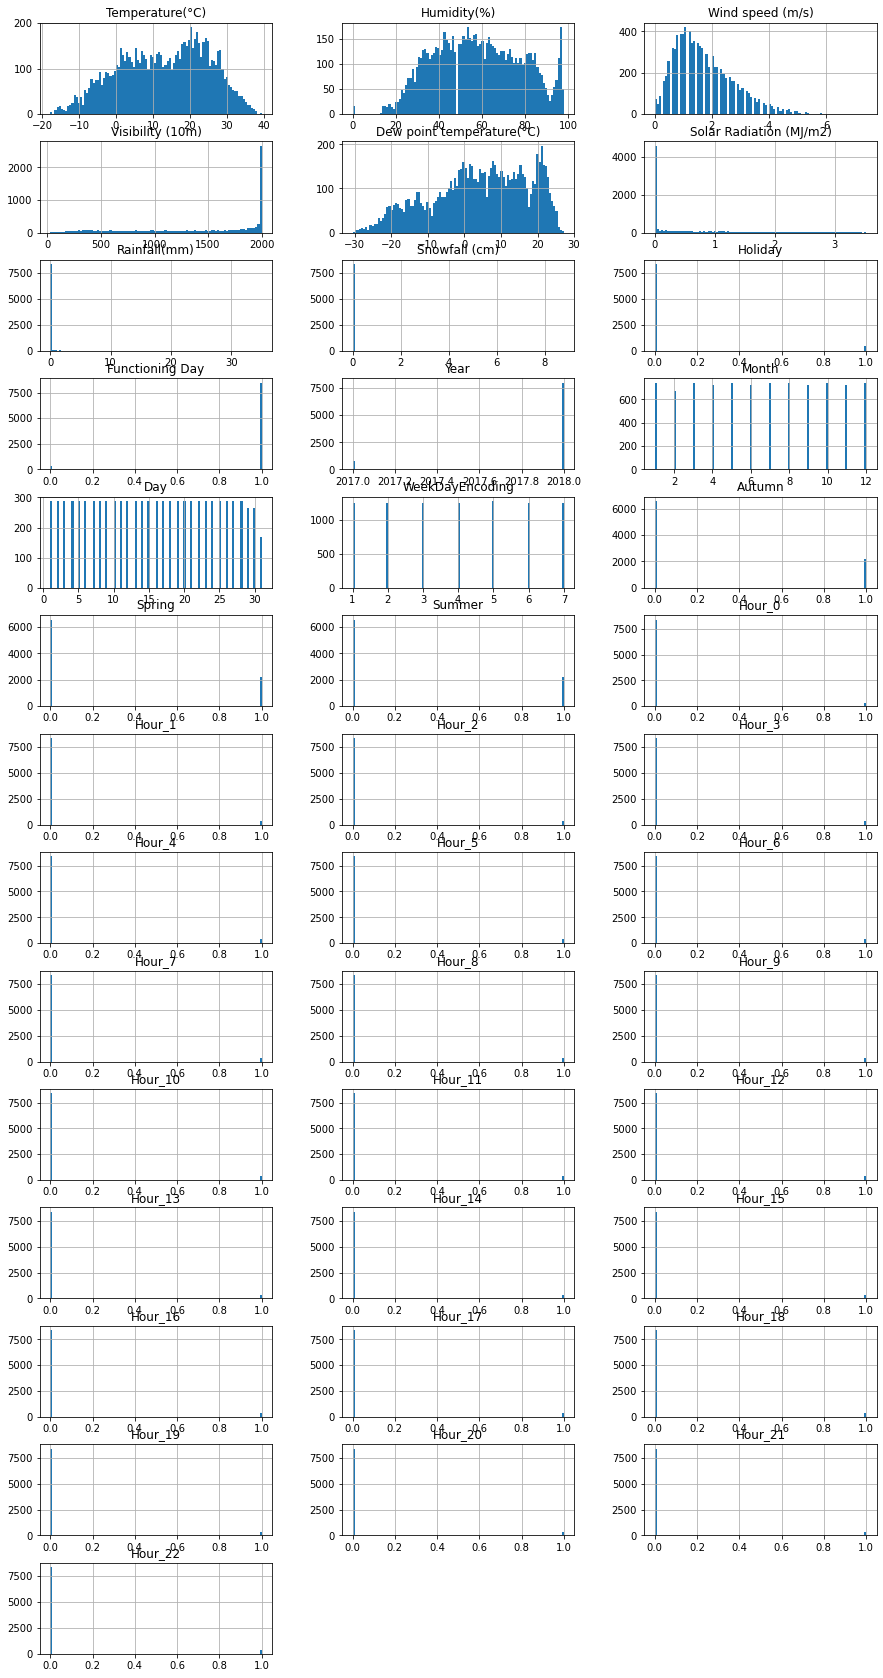

In [119]:
Dataset.hist(column=list(Dataset)[1:], figsize=(15,30),bins=100, layout=(14,3))

array([[<AxesSubplot:title={'center':'Solar Radiation (MJ/m2)'}>]],
      dtype=object)

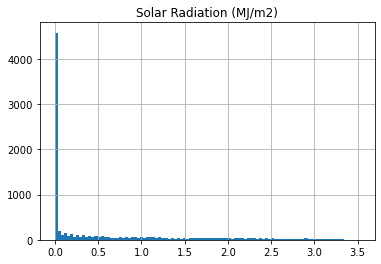

In [120]:
Dataset.hist(column='Solar Radiation (MJ/m2)',bins=100)

array([[<AxesSubplot:title={'center':'Rented Bike Count'}>]], dtype=object)

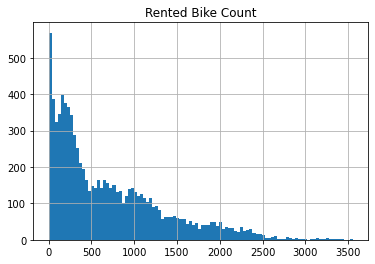

In [121]:
Dataset.hist(column='Rented Bike Count', bins=100)

In [122]:
Dataset.skew(axis=0, skipna=True, level=None)

Rented Bike Count             1.153428
Temperature(°C)              -0.198326
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Solar Radiation (MJ/m2)       1.504040
Rainfall(mm)                 14.533232
Snowfall (cm)                 8.440801
Holiday                       4.163603
Functioning Day              -5.170969
Year                         -2.978262
Month                        -0.010458
Day                           0.007522
WeekDayEncoding              -0.003771
Autumn                        1.159123
Spring                        1.142294
Summer                        1.142294
Hour_0                        4.588103
Hour_1                        4.588103
Hour_2                        4.588103
Hour_3                        4.588103
Hour_4                        4.588103
Hour_5                        4.588103
Hour_6                        4.588103
Hour_7                   

In [123]:
Dataset.corr()

Rented Bike Count  Temperature(°C)  Humidity(%)  \
Rented Bike Count                   1.000000         0.538558    -0.199780   
Temperature(°C)                     0.538558         1.000000     0.159371   
Humidity(%)                        -0.199780         0.159371     1.000000   
Wind speed (m/s)                    0.121108        -0.036252    -0.336683   
Visibility (10m)                    0.199280         0.034794    -0.543090   
Dew point temperature(°C)           0.379788         0.912798     0.536894   
Solar Radiation (MJ/m2)             0.261837         0.353505    -0.461919   
Rainfall(mm)                       -0.123074         0.050282     0.236397   
Snowfall (cm)                      -0.141804        -0.218405     0.108183   
Holiday                            -0.072338        -0.055931    -0.050278   
Functioning Day                     0.203943        -0.050170    -0.020800   
Year                                0.215162         0.377796     0.035925   
Month                               0.133514         0.216183     0.139875   
Day                                 0.022291         0.015645    -0.029044   
WeekDayEncoding                    -0.029357        -0.003368    -0.007620   
Autumn                              0.102753         0.059728     0.028367   
Spring                              0.022888         0.007960     0.015694   
Summer                              0.296549         0.665846     0.192595   
Hour_0                             -0.052743        -0.027873     0.069340   
Hour_1                             -0.090012        -0.034210     0.080928   
Hour_2                             -0.130280        -0.040002     0.092992   
Hour_3                             -0.162060        -0.045201     0.101493   
Hour_4                             -0.184930        -0.049869     0.107582   
Hour_5                             -0.182831        -0.054365     0.115690   
Hour_6                             -0.134827        -0.058000     0.122648   
Hour_7                             -0.031876        -0.057642     0.112716   
Hour_8                              0.100578        -0.047239     0.082302   
Hour_9                             -0.018951        -0.026309     0.022457   
Hour_10                            -0.057153         0.000475    -0.032731   
Hour_11                            -0.033542         0.024916    -0.078435   
Hour_12                            -0.001669         0.045027    -0.110055   
Hour_13                             0.009261         0.058879    -0.134240   
Hour_14                             0.017530         0.068674    -0.147539   
Hour_15                             0.040278         0.072505    -0.150092   
Hour_16                             0.073072         0.070066    -0.139767   
Hour_17                             0.140281         0.058864    -0.110644   
Hour_18                             0.258096         0.042210    -0.075489   
Hour_19                             0.158592         0.024399    -0.036126   
Hour_20                             0.117798         0.008845    -0.005319   
Hour_21                             0.105669        -0.002404     0.019287   
Hour_22                             0.070542        -0.011788     0.038870   

                           Wind speed (m/s)  Visibility (10m)  \
Rented Bike Count                  0.121108          0.199280   
Temperature(°C)                   -0.036252          0.034794   
Humidity(%)                       -0.336683         -0.543090   
Wind speed (m/s)                   1.000000          0.171507   
Visibility (10m)                   0.171507          1.000000   
Dew point temperature(°C)         -0.176486         -0.176630   
Solar Radiation (MJ/m2)            0.332274          0.149738   
Rainfall(mm)                      -0.019674         -0.167629   
Snowfall (cm)                     -0.003554         -0.121695   
Holiday                            0.023017          0.031773   
Functioning Day                    

In [124]:
def plot_corr(Dataset, size=26):
    corr = Dataset.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

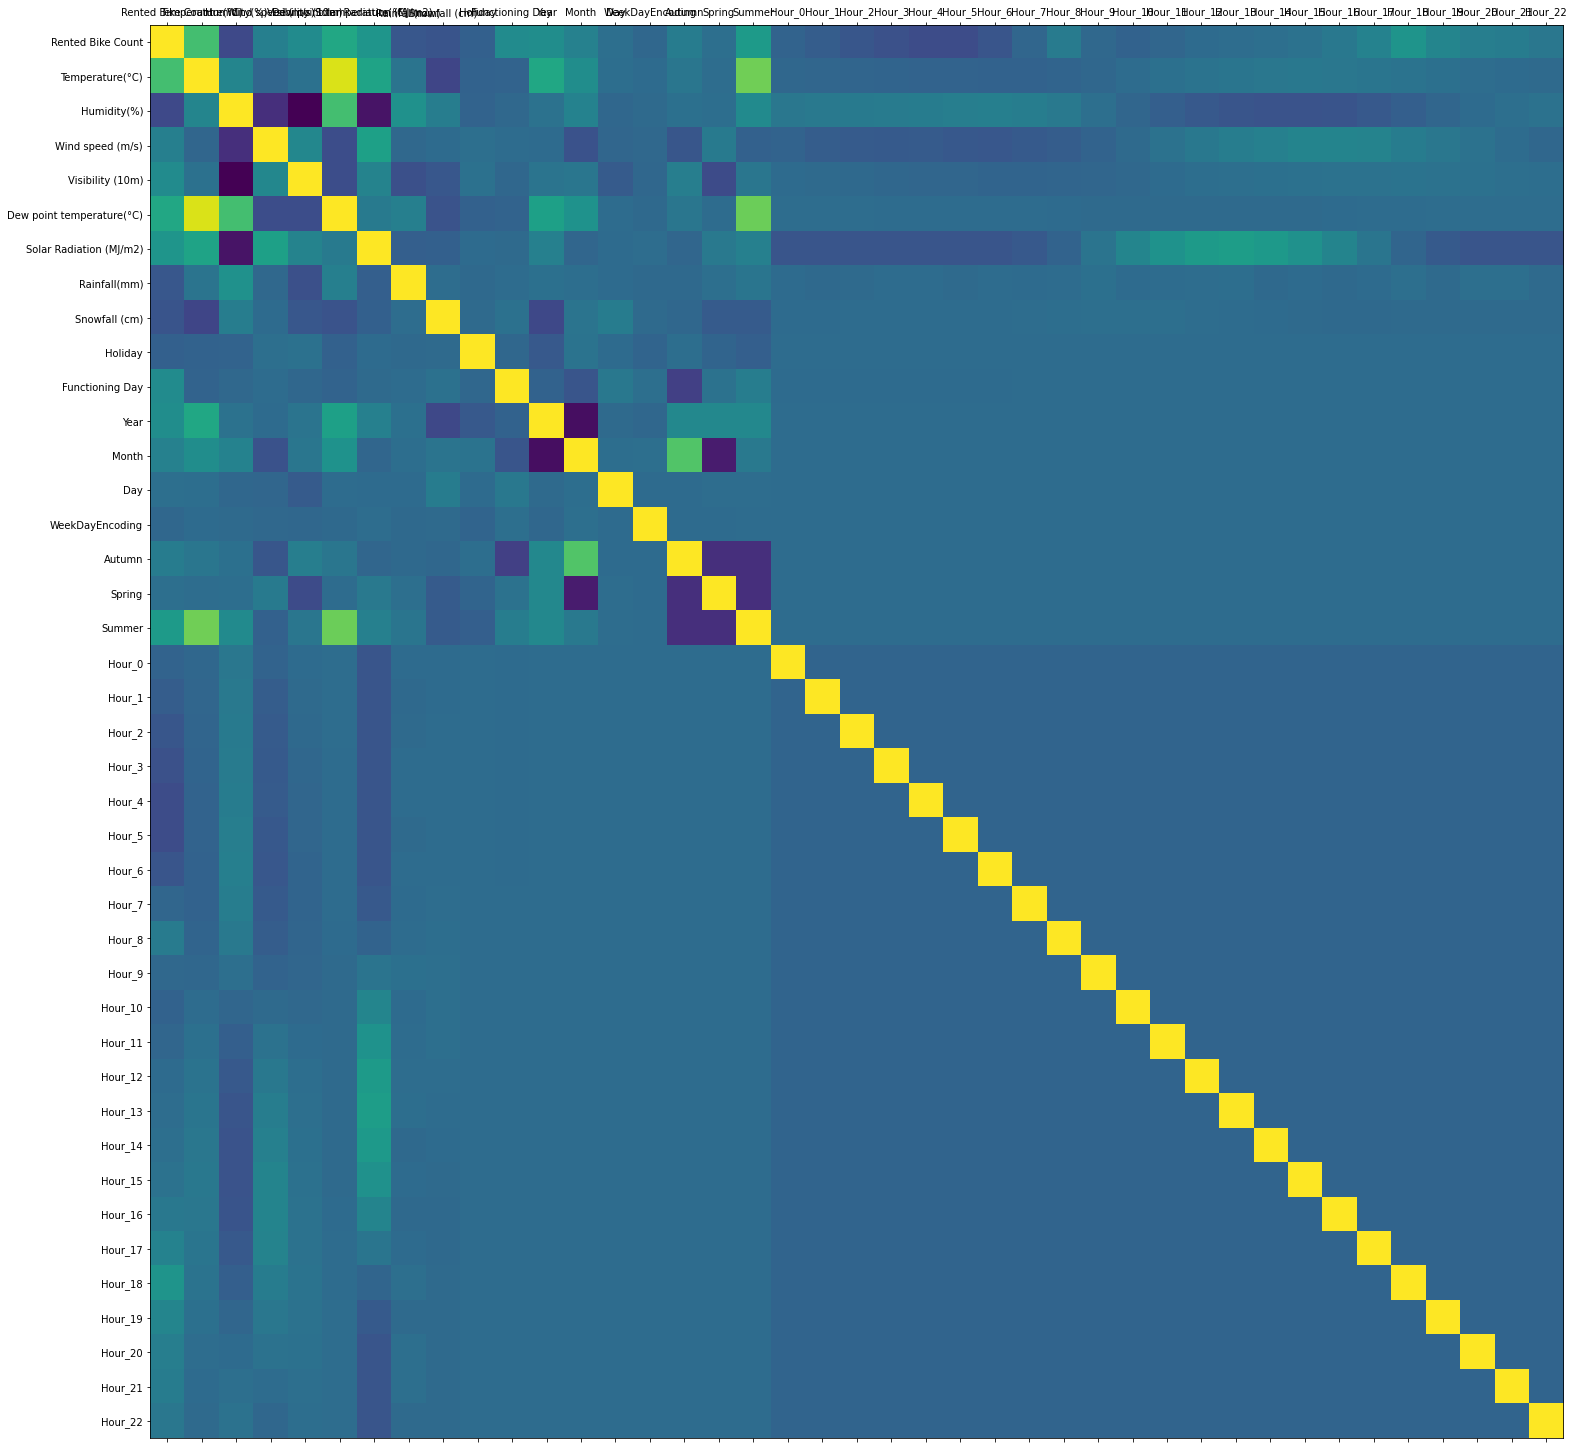

In [125]:
plot_corr(Dataset)

In [126]:
sns.pairplot(Dataset,diag_kind='kde')

<AxesSubplot:xlabel='Temperature(°C)', ylabel='Rented Bike Count'>

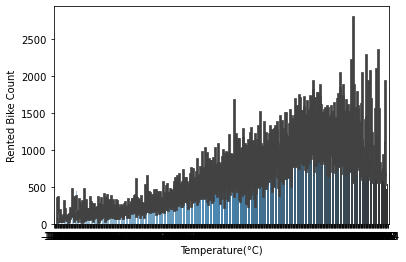

In [127]:
sns.barplot(x='Temperature(°C)', y='Rented Bike Count', data=Dataset, palette='Blues_d')

<AxesSubplot:xlabel='Temperature(°C)', ylabel='Rented Bike Count'>

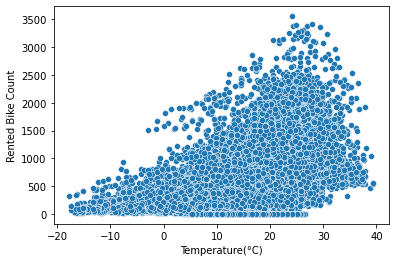

In [128]:
sns.scatterplot(x='Temperature(°C)', y='Rented Bike Count', data=Dataset, palette='Blues_d')

<AxesSubplot:xlabel='Temperature(°C)', ylabel='Dew point temperature(°C)'>

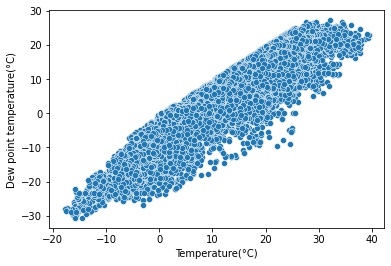

In [129]:
sns.scatterplot(x='Temperature(°C)', y='Dew point temperature(°C)', data=Dataset, palette='Blues_d')

From the above plot, we can observe the perfect linear relation between temperature and Dew point temperature. Due to collinearity issue, dropping one of the variables.

In [130]:
Dataset = Dataset.drop('Dew point temperature(°C)', axis =1)

In [131]:
Dataset.head()

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254             -5.2           37               2.2   
1                204             -5.5           38               0.8   
2                173             -6.0           39               1.0   
3                107             -6.2           40               0.9   
4                 78             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Holiday  Functioning Day  ...  Hour_13  Hour_14  Hour_15  Hour_16  Hour_17  \
0        0                1  ...        0        0        0        0        0   
1        0                1  ...        0        0        0        0        0   
2        0                1  ...        0        0        0        0        0   
3        0                1  ...        0        0        0        0        0   
4        0                1  ...        0        0        0        0        0   

   Hour_18  Hour_19  Hour_20  Hour_21  Hour_22  
0        0        0        0        0        0  
1        0        0        0        0        0  
2        0        0        0        0        0  
3        0        0        0        0        0  
4        0        0        0        0        0  

[5 rows x 40 columns]

In [132]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Temperature(°C)          8760 non-null   float64
 2   Humidity(%)              8760 non-null   int64  
 3   Wind speed (m/s)         8760 non-null   float64
 4   Visibility (10m)         8760 non-null   int64  
 5   Solar Radiation (MJ/m2)  8760 non-null   float64
 6   Rainfall(mm)             8760 non-null   float64
 7   Snowfall (cm)            8760 non-null   float64
 8   Holiday                  8760 non-null   int64  
 9   Functioning Day          8760 non-null   int64  
 10  Year                     8760 non-null   int64  
 11  Month                    8760 non-null   int64  
 12  Day                      8760 non-null   int64  
 13  WeekDayEncoding          8760 non-null   int64  
 14  Autumn                  

<AxesSubplot:xlabel='Humidity(%)', ylabel='Rented Bike Count'>

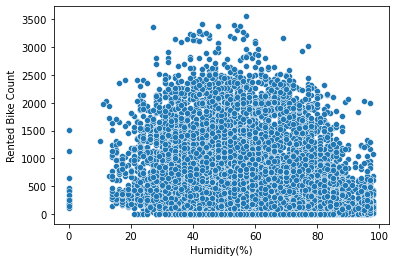

In [133]:
sns.scatterplot(y='Rented Bike Count', x='Humidity(%)', data=Dataset, palette='Blues_d')

<AxesSubplot:xlabel='Visibility (10m)', ylabel='Rented Bike Count'>

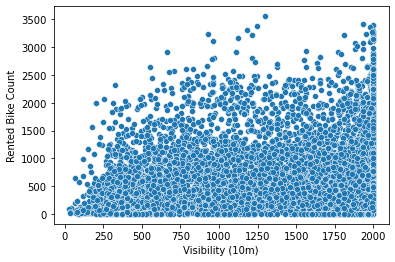

In [134]:
sns.scatterplot(y='Rented Bike Count', x='Visibility (10m)', data=Dataset, palette='Blues_d')

<AxesSubplot:xlabel='Humidity(%)', ylabel='Rented Bike Count'>

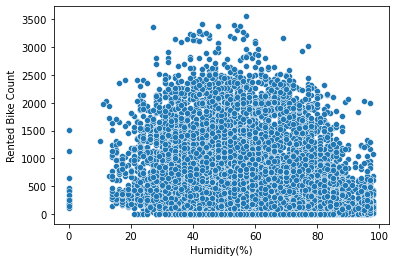

In [135]:
sns.scatterplot(y='Rented Bike Count', x='Humidity(%)', data=Dataset, palette='Blues_d')

<AxesSubplot:xlabel='Wind speed (m/s)'>

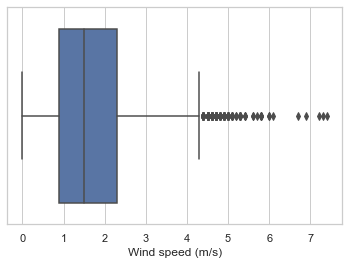

In [136]:
sns.set_theme(style="whitegrid")
sns.boxplot(x='Wind speed (m/s)', data = Dataset)

<AxesSubplot:xlabel='Solar Radiation (MJ/m2)'>

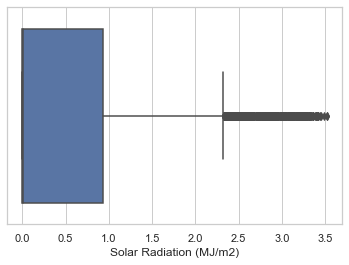

In [137]:
sns.set_theme(style="whitegrid")
sns.boxplot(x='Solar Radiation (MJ/m2)', data = Dataset)

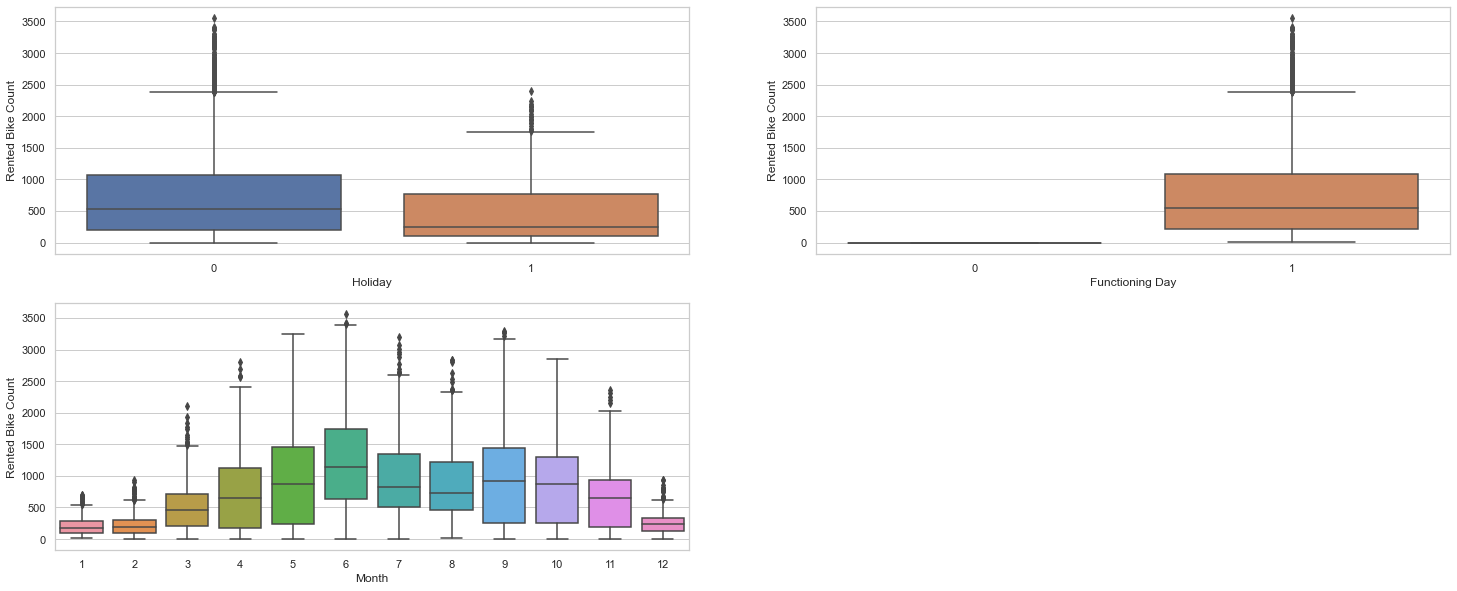

In [138]:
plt.figure(figsize=(25, 10))
plt.subplot(2,2,1)
sns.boxplot(x = 'Holiday', y = 'Rented Bike Count', data = Dataset)
plt.subplot(2,2,2)
sns.boxplot(x = 'Functioning Day', y = 'Rented Bike Count', data = Dataset)
plt.subplot(2,2,3)
sns.boxplot(x = 'Month', y = 'Rented Bike Count', data = Dataset)
plt.show()

## Part1: Data Spliting

Converting output to Binary classification

array([[<AxesSubplot:title={'center':'Rented Bike Count'}>]], dtype=object)

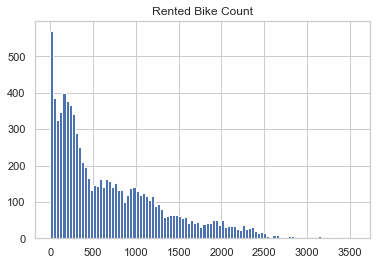

In [139]:
Dataset.hist(column='Rented Bike Count', bins=100)

In [140]:
median = statistics.median(Dataset['Rented Bike Count'])
median

504.5

In [141]:
Dataset[Dataset['Rented Bike Count'] > median].count()

Rented Bike Count          4380
Temperature(°C)            4380
Humidity(%)                4380
Wind speed (m/s)           4380
Visibility (10m)           4380
Solar Radiation (MJ/m2)    4380
Rainfall(mm)               4380
Snowfall (cm)              4380
Holiday                    4380
Functioning Day            4380
Year                       4380
Month                      4380
Day                        4380
WeekDayEncoding            4380
Autumn                     4380
Spring                     4380
Summer                     4380
Hour_0                     4380
Hour_1                     4380
Hour_2                     4380
Hour_3                     4380
Hour_4                     4380
Hour_5                     4380
Hour_6                     4380
Hour_7                     4380
Hour_8                     4380
Hour_9                     4380
Hour_10                    4380
Hour_11                    4380
Hour_12                    4380
Hour_13                    4380
Hour_14 

In [142]:
Dataset['Rented Bike Count'].where(Dataset['Rented Bike Count'] > median, 1, inplace = True)

In [143]:
Dataset['Rented Bike Count'].where(Dataset['Rented Bike Count'] <= median, 0, inplace = True)

In [144]:
pd.unique(Dataset['Rented Bike Count'])

array([1, 0])

In [145]:
Dataset['Rented Bike Count'].value_counts()

1    4380
0    4380
Name: Rented Bike Count, dtype: int64

array([[<AxesSubplot:title={'center':'Rented Bike Count'}>]], dtype=object)

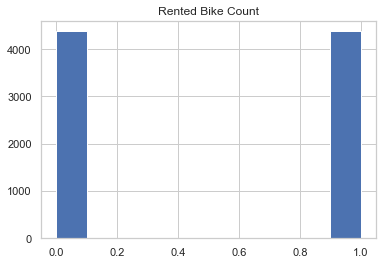

In [146]:
Dataset.hist(column = 'Rented Bike Count')

In [147]:
# Independent vs target variable
y = Dataset['Rented Bike Count']                  # Target variable
x = Dataset.drop(['Rented Bike Count'],axis=1)    # Predictor variable

In [148]:
# Split: Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)  # shuffle=True

In [149]:
x_train.head()

Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
5129             25.3           87               0.6               751   
6490             25.4           75               0.7              1995   
6672             21.1           64               1.5              2000   
68                5.2           87               1.4               253   
8224             11.7           96               1.4               587   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Holiday  \
5129                     0.49           0.0            0.0        0   
6490                     0.96           0.0            0.0        0   
6672                     0.00           0.0            0.0        0   
68                       0.00           0.0            0.0        0   
8224                     0.02           0.0            0.0        0   

      Functioning Day  Year  ...  Hour_13  Hour_14  Hour_15  Hour_16  Hour_17  \
5129                1  2018  ...        0        0        0        0        1   
6490                1  2018  ...        0        0        0        0        0   
6672                1  2018  ...        0        0        0        0        0   
68                  1  2017  ...        0        0        0        0        0   
8224                1  2018  ...        0        0        0        1        0   

      Hour_18  Hour_19  Hour_20  Hour_21  Hour_22  
5129        0        0        0        0        0  
6490        0        0        0        0        0  
6672        0        0        0        0        0  
68          0        0        1        0        0  
8224        0        0        0        0        0  

[5 rows x 39 columns]

In [150]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6132 entries, 5129 to 235
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature(°C)          6132 non-null   float64
 1   Humidity(%)              6132 non-null   int64  
 2   Wind speed (m/s)         6132 non-null   float64
 3   Visibility (10m)         6132 non-null   int64  
 4   Solar Radiation (MJ/m2)  6132 non-null   float64
 5   Rainfall(mm)             6132 non-null   float64
 6   Snowfall (cm)            6132 non-null   float64
 7   Holiday                  6132 non-null   int64  
 8   Functioning Day          6132 non-null   int64  
 9   Year                     6132 non-null   int64  
 10  Month                    6132 non-null   int64  
 11  Day                      6132 non-null   int64  
 12  WeekDayEncoding          6132 non-null   int64  
 13  Autumn                   6132 non-null   uint8  
 14  Spring                

In [151]:
x_test.head()

Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
4136             18.2           63               0.8              1731   
6705             23.5           72               0.5              1485   
3538             15.3           50               1.0               944   
6583             21.1           81               1.0              1738   
1993             -2.2           58               1.0              2000   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Holiday  \
4136                     1.00           0.0            0.0        1   
6705                     0.95           0.0            0.0        0   
3538                     1.97           0.0            0.0        0   
6583                     0.14           0.0            0.0        0   
1993                     0.00           0.0            0.0        0   

      Functioning Day  Year  ...  Hour_13  Hour_14  Hour_15  Hour_16  Hour_17  \
4136                1  2018  ...        0        0        0        0        0   
6705                1  2018  ...        0        0        0        0        0   
3538                1  2018  ...        0        0        0        0        0   
6583                1  2018  ...        0        0        0        0        0   
1993                1  2018  ...        0        0        0        0        0   

      Hour_18  Hour_19  Hour_20  Hour_21  Hour_22  
4136        0        0        0        0        0  
6705        0        0        0        0        0  
3538        0        0        0        0        0  
6583        0        0        0        0        0  
1993        0        0        0        0        0  

[5 rows x 39 columns]

Data Scaling:

In [152]:
print(x_train['Rainfall(mm)'].describe())
print(x_train['Snowfall (cm)'].describe())
print(x_test['Rainfall(mm)'].describe())
print(x_test['Snowfall (cm)'].describe())

count    6132.000000
mean        0.155545
std         1.192167
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        35.000000
Name: Rainfall(mm), dtype: float64
count    6132.000000
mean        0.075718
std         0.428246
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.800000
Name: Snowfall (cm), dtype: float64
count    2628.000000
mean        0.132686
std         0.962546
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        18.000000
Name: Rainfall(mm), dtype: float64
count    2628.000000
mean        0.073554
std         0.456043
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.800000
Name: Snowfall (cm), dtype: float64


In [153]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_transform=sc.fit_transform(x_train)

In [154]:
sc=StandardScaler()
x_test_transform=sc.fit_transform(x_test)

In [155]:
print(x_test_transform)

[[ 0.44609838  0.25194735 -0.92577124 ... -0.19992084 -0.21585871
  -0.19260192]
 [ 0.89918082  0.69319567 -1.22243346 ... -0.19992084 -0.21585871
  -0.19260192]
 [ 0.19818534 -0.38541135 -0.72799643 ... -0.19992084 -0.21585871
  -0.19260192]
 ...
 [-1.19525687 -1.12082523  0.95308945 ... -0.19992084 -0.21585871
  -0.19260192]
 [-0.00698406 -0.97374245  0.85420205 ... -0.19992084 -0.21585871
  -0.19260192]
 [-1.01573364 -0.87568727 -1.22243346 ... -0.19992084 -0.21585871
   5.19205613]]


In [156]:
class_names = [0,1]

## Experimentation 1:

In [157]:
from sklearn.neural_network import MLPClassifier
hiddenlayerlist=[(10,),(10,10),(10,10,10),(10,10,10,10)]
nnmodeltrainscorelist=[]
nnmodeltestscorelist=[]
nnmodeltrainerrorlist=[]
nnmodeltesterrorlist=[]
nnmodeltimecmplxlist=[]
loss_curve_list=[]
iterlist=[]
j=0

[0.943085453359426, 0.9636333985649054, 0.9624918460534899, 0.9649380300065231]
[0.9334094368340944, 0.9417808219178082, 0.9364535768645358, 0.932648401826484]
[0.05691454664057405, 0.036366601435094625, 0.03750815394651008, 0.03506196999347688]
[0.06659056316590561, 0.05821917808219179, 0.06354642313546421, 0.06735159817351599]
[3.4961981773376465, 7.365878105163574, 13.433604717254639, 10.805318832397461]
[425, 706, 925, 598]


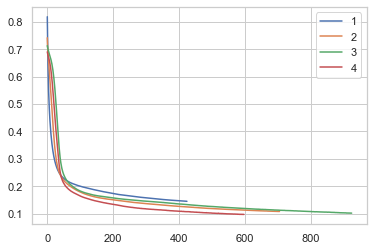

In [158]:
for i in range(len(hiddenlayerlist)):
    starttime=time.time()
    j=i+1
    nnmodel=MLPClassifier(hidden_layer_sizes=hiddenlayerlist[i],solver='sgd',max_iter=1000000,random_state=42)
    nnmodel.fit(x_train_transform,y_train)
    endtime=time.time()
    nnmodeltrainscore=nnmodel.score(x_train_transform, y_train)
    nnmodeltestscore=nnmodel.score(x_test_transform, y_test)
    nnmodeltrainerror=1-nnmodeltrainscore
    nnmodeltesterror=1-nnmodeltestscore
    timecmplx=endtime-starttime
    loss_curve_list=nnmodel.loss_curve_
    maxiter=nnmodel.n_iter_
    iterlist.append(maxiter)
    nnmodeltrainscorelist.append(nnmodeltrainscore)
    nnmodeltestscorelist.append(nnmodeltestscore)
    nnmodeltrainerrorlist.append(nnmodeltrainerror)
    nnmodeltesterrorlist.append(nnmodeltesterror)
    nnmodeltimecmplxlist.append(timecmplx)
    plt.plot(loss_curve_list,label=j)
    plt.legend(loc="upper right")
print(nnmodeltrainscorelist)
print(nnmodeltestscorelist)
print(nnmodeltrainerrorlist)
print(nnmodeltesterrorlist)
print(nnmodeltimecmplxlist)
print(iterlist)

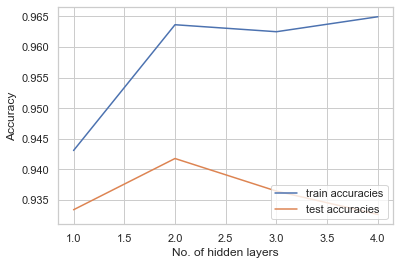

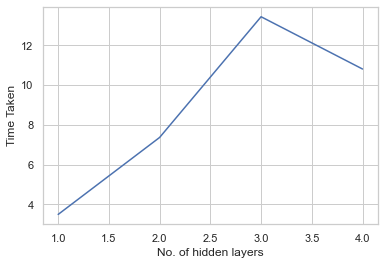

In [159]:
hiddenlayer_cnt=[1,2,3,4]
plt.plot(hiddenlayer_cnt, nnmodeltrainscorelist,label="train accuracies")
plt.plot(hiddenlayer_cnt, nnmodeltestscorelist,label="test accuracies")
plt.legend(loc="lower right")
plt.xlabel("No. of hidden layers")
plt.ylabel("Accuracy")
plt.show()
plt.plot(hiddenlayer_cnt, nnmodeltimecmplxlist,label="time complexity")
plt.xlabel("No. of hidden layers")
plt.ylabel("Time Taken")
plt.show()

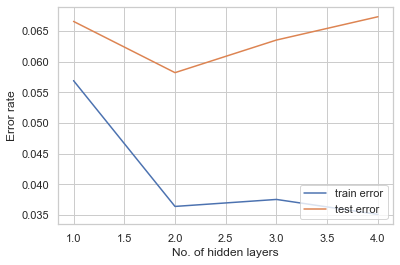

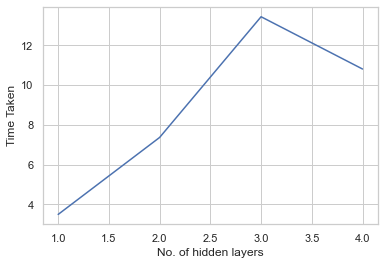

In [160]:
hiddenlayer_cnt=[1,2,3,4]
plt.plot(hiddenlayer_cnt, nnmodeltrainerrorlist,label="train error")
plt.plot(hiddenlayer_cnt, nnmodeltesterrorlist,label="test error")
plt.legend(loc="lower right")
plt.xlabel("No. of hidden layers")
plt.ylabel("Error rate")
plt.show()
plt.plot(hiddenlayer_cnt, nnmodeltimecmplxlist,label="time complexity")
plt.xlabel("No. of hidden layers")
plt.ylabel("Time Taken")
plt.show()

##### From the above it is clearly indicating that with 2 layers we are getting the efficient results w.r.t accuracies and w.r.t time complexity and w.r.t algorithm convergence, so we take baseline as 2 layers and continue experimenting with different nr of nodes: moving towards bias

## Experimentation 2:

In [161]:
from sklearn.neural_network import MLPClassifier
hiddenlayernodelist=[(2,2),(5,5),(10,10),(15,15),(20,20),(25,25),(30,30)]
nnmodeltrainscorelist1=[]
nnmodeltestscorelist1=[]
nnmodeltrainerrorlist1=[]
nnmodeltesterrorlist1=[]
nnmodeltimecmplxlist1=[]
loss_curve_list=[]
iterlist1=[]
j=0

[0.9212328767123288, 0.9372146118721462, 0.9636333985649054, 0.9523809523809523, 0.9675472928897586, 0.9569471624266145, 0.9794520547945206]
[0.9136225266362252, 0.9269406392694064, 0.9417808219178082, 0.9341704718417048, 0.9425418569254186, 0.9448249619482496, 0.9417808219178082]
[0.07876712328767121, 0.06278538812785384, 0.036366601435094625, 0.04761904761904767, 0.0324527071102414, 0.043052837573385516, 0.020547945205479423]
[0.08637747336377477, 0.0730593607305936, 0.05821917808219179, 0.06582952815829524, 0.057458143074581414, 0.05517503805175039, 0.05821917808219179]
[3.987898826599121, 4.645426988601685, 9.259132146835327, 9.065853834152222, 15.942071914672852, 9.198729991912842, 26.2329683303833]
[436, 446, 706, 487, 883, 475, 1202]


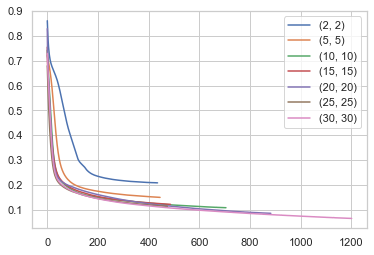

In [162]:
for i in range(len(hiddenlayernodelist)):
    starttime=time.time()
    j=i+1
    nnmodel=MLPClassifier(hidden_layer_sizes=hiddenlayernodelist[i],solver='sgd',max_iter=1000000,random_state=42)
    nnmodel.fit(x_train_transform,y_train)
    endtime=time.time()
    nnmodeltrainscore=nnmodel.score(x_train_transform, y_train)
    nnmodeltestscore=nnmodel.score(x_test_transform, y_test)
    nnmodeltrainerror=1-nnmodeltrainscore
    nnmodeltesterror=1-nnmodeltestscore
    timecmplx=endtime-starttime
    loss_curve_list=nnmodel.loss_curve_
    maxiter=nnmodel.n_iter_
    iterlist1.append(maxiter)
    nnmodeltrainscorelist1.append(nnmodeltrainscore)
    nnmodeltestscorelist1.append(nnmodeltestscore)
    nnmodeltrainerrorlist1.append(nnmodeltrainerror)
    nnmodeltesterrorlist1.append(nnmodeltesterror)
    nnmodeltimecmplxlist1.append(timecmplx)
    plt.plot(loss_curve_list,label=hiddenlayernodelist[i])
    plt.legend(loc="upper right")
print(nnmodeltrainscorelist1)
print(nnmodeltestscorelist1)
print(nnmodeltrainerrorlist1)
print(nnmodeltesterrorlist1)
print(nnmodeltimecmplxlist1)
print(iterlist1)

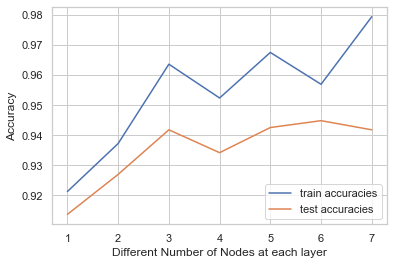

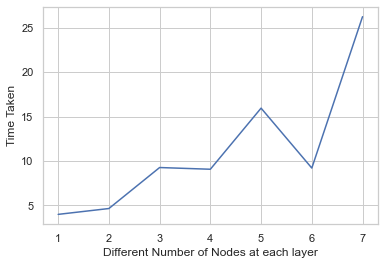

In [163]:
hiddenlayernode_cnt=[1,2,3,4,5,6,7]
plt.plot(hiddenlayernode_cnt, nnmodeltrainscorelist1,label="train accuracies")
plt.plot(hiddenlayernode_cnt, nnmodeltestscorelist1,label="test accuracies")
plt.legend(loc="lower right")
plt.xlabel("Different Number of Nodes at each layer")
plt.ylabel("Accuracy")
plt.show()
plt.plot(hiddenlayernode_cnt, nnmodeltimecmplxlist1,label="time complexity")
plt.xlabel("Different Number of Nodes at each layer")
plt.ylabel("Time Taken")
plt.show()

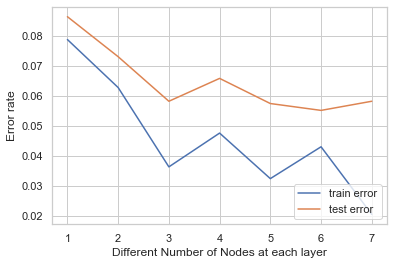

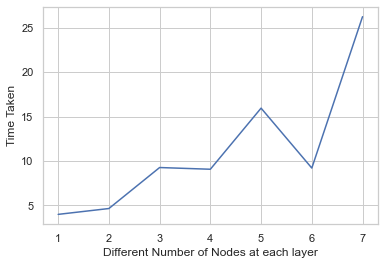

In [164]:
hiddenlayernode_cnt=[1,2,3,4,5,6,7]
plt.plot(hiddenlayernode_cnt, nnmodeltrainerrorlist1,label="train error")
plt.plot(hiddenlayernode_cnt, nnmodeltesterrorlist1,label="test error")
plt.legend(loc="lower right")
plt.xlabel("Different Number of Nodes at each layer")
plt.ylabel("Error rate")
plt.show()
plt.plot(hiddenlayernode_cnt, nnmodeltimecmplxlist1,label="time complexity")
plt.xlabel("Different Number of Nodes at each layer")
plt.ylabel("Time Taken")
plt.show()

##### From above we can conclude that at nodes (25,25) model is predicting good and converging faster 

## Experimentation 3:

In [165]:
from sklearn.neural_network import MLPClassifier
activationfunctions=['identity','logistic','tanh','relu']
nnmodeltrainscorelist2=[]
nnmodeltestscorelist2=[]
nnmodeltrainerrorlist2=[]
nnmodeltesterrorlist2=[]
nnmodeltimecmplxlist2=[]
loss_curve_list=[]
iterlist2=[]
j=0

[0.9186236138290933, 0.9155251141552512, 0.9712981082844097, 0.9569471624266145]
[0.9162861491628614, 0.910958904109589, 0.9364535768645358, 0.9448249619482496]
[0.0813763861709067, 0.08447488584474883, 0.028701891715590344, 0.043052837573385516]
[0.08371385083713856, 0.08904109589041098, 0.06354642313546421, 0.05517503805175039]
[1.9984419345855713, 9.158781051635742, 24.659144163131714, 9.643097877502441]
[129, 446, 1109, 475]


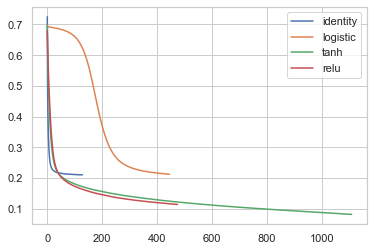

In [166]:
for i in range(len(activationfunctions)):
    starttime=time.time()
    j=i+1
    nnmodel=MLPClassifier(hidden_layer_sizes=(25,25),activation=activationfunctions[i],solver='sgd',max_iter=1000000,random_state=42)
    nnmodel.fit(x_train_transform,y_train)
    endtime=time.time()
    nnmodeltrainscore=nnmodel.score(x_train_transform, y_train)
    nnmodeltestscore=nnmodel.score(x_test_transform, y_test)
    nnmodeltrainerror=1-nnmodeltrainscore
    nnmodeltesterror=1-nnmodeltestscore
    timecmplx=endtime-starttime
    loss_curve_list=nnmodel.loss_curve_
    maxiter=nnmodel.n_iter_
    iterlist2.append(maxiter)
    nnmodeltrainscorelist2.append(nnmodeltrainscore)
    nnmodeltestscorelist2.append(nnmodeltestscore)
    nnmodeltrainerrorlist2.append(nnmodeltrainerror)
    nnmodeltesterrorlist2.append(nnmodeltesterror)
    nnmodeltimecmplxlist2.append(timecmplx)
    plt.plot(loss_curve_list,label=activationfunctions[i])
    plt.legend(loc="upper right")
print(nnmodeltrainscorelist2)
print(nnmodeltestscorelist2)
print(nnmodeltrainerrorlist2)
print(nnmodeltesterrorlist2)
print(nnmodeltimecmplxlist2)
print(iterlist2)

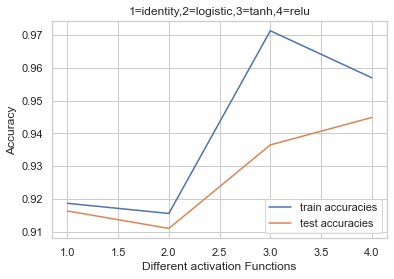

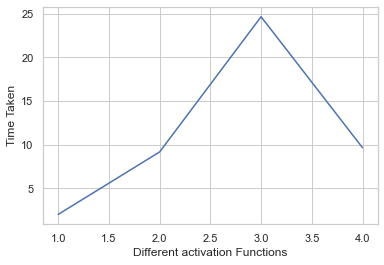

In [167]:
activationfunctionforplot=[1,2,3,4]
plt.plot(activationfunctionforplot, nnmodeltrainscorelist2,label="train accuracies")
plt.plot(activationfunctionforplot, nnmodeltestscorelist2,label="test accuracies")
plt.legend(loc="lower right")
plt.xlabel("Different activation Functions")
plt.ylabel("Accuracy")
plt.title("1=identity,2=logistic,3=tanh,4=relu")
plt.show()
plt.plot(activationfunctionforplot, nnmodeltimecmplxlist2,label="time complexity")
plt.xlabel("Different activation Functions")
plt.ylabel("Time Taken")
plt.show()

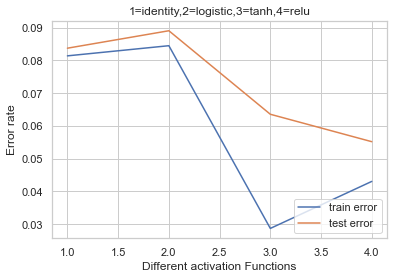

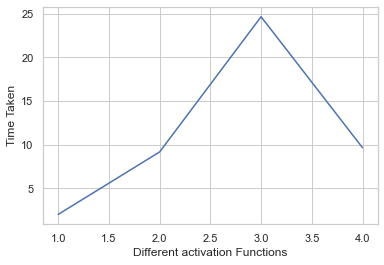

In [168]:
activationfunctionforplot=[1,2,3,4]
plt.plot(activationfunctionforplot, nnmodeltrainerrorlist2,label="train error")
plt.plot(activationfunctionforplot, nnmodeltesterrorlist2,label="test error")
plt.legend(loc="lower right")
plt.xlabel("Different activation Functions")
plt.ylabel("Error rate")
plt.title("1=identity,2=logistic,3=tanh,4=relu")
plt.show()
plt.plot(activationfunctionforplot, nnmodeltimecmplxlist2,label="time complexity")
plt.xlabel("Different activation Functions")
plt.ylabel("Time Taken")
plt.show()

## Experimentation 4:

In [169]:
solvers=['lbfgs','sgd','adam']
nnmodeltrainscorelist3=[]
nnmodeltestscorelist3=[]
nnmodeltrainerrorlist3=[]
nnmodeltesterrorlist3=[]
nnmodeltimecmplxlist3=[]
iterlist3=[]

In [170]:
for i in range(len(solvers)):
    starttime=time.time()
    j=i+1
    nnmodel=MLPClassifier(hidden_layer_sizes=(25,25),activation='relu',solver=solvers[i],max_iter=1000000,random_state=42)
    nnmodel.fit(x_train_transform,y_train)
    endtime=time.time()
    nnmodeltrainscore=nnmodel.score(x_train_transform, y_train)
    nnmodeltestscore=nnmodel.score(x_test_transform, y_test)
    nnmodeltrainerror=1-nnmodeltrainscore
    nnmodeltesterror=1-nnmodeltestscore
    timecmplx=endtime-starttime
    maxiter=nnmodel.n_iter_
    iterlist3.append(maxiter)
    nnmodeltrainscorelist3.append(nnmodeltrainscore)
    nnmodeltestscorelist3.append(nnmodeltestscore)
    nnmodeltrainerrorlist3.append(nnmodeltrainerror)
    nnmodeltesterrorlist3.append(nnmodeltesterror)
    nnmodeltimecmplxlist3.append(timecmplx)
print(nnmodeltrainscorelist3)
print(nnmodeltestscorelist3)
print(nnmodeltrainerrorlist3)
print(nnmodeltesterrorlist3)
print(nnmodeltimecmplxlist3)
print(iterlist3)

[1.0, 0.9569471624266145, 0.9954337899543378]
[0.9273211567732116, 0.9448249619482496, 0.9394977168949772]
[0.0, 0.043052837573385516, 0.004566210045662156]
[0.07267884322678841, 0.05517503805175039, 0.060502283105022814]
[1.1850719451904297, 8.661283016204834, 6.586306810379028]
[190, 475, 331]


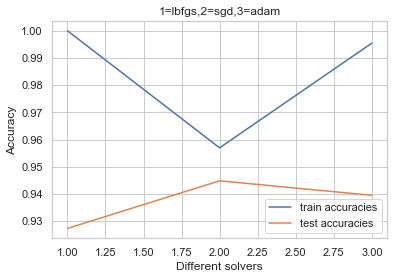

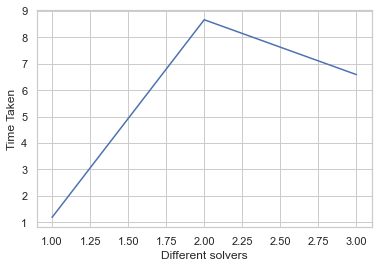

In [171]:
solverforplot=[1,2,3]
plt.plot(solverforplot, nnmodeltrainscorelist3,label="train accuracies")
plt.plot(solverforplot, nnmodeltestscorelist3,label="test accuracies")
plt.legend(loc="lower right")
plt.xlabel("Different solvers")
plt.ylabel("Accuracy")
plt.title("1=lbfgs,2=sgd,3=adam")
plt.show()
plt.plot(solverforplot, nnmodeltimecmplxlist3,label="time complexity")
plt.xlabel("Different solvers")
plt.ylabel("Time Taken")
plt.show()

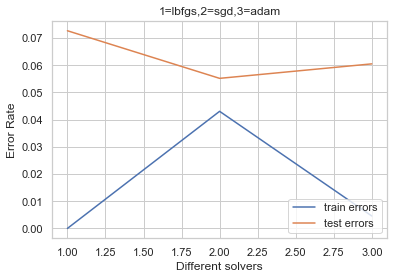

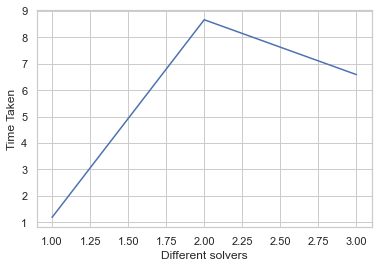

In [172]:
solverforplot=[1,2,3]
plt.plot(solverforplot, nnmodeltrainerrorlist3,label="train errors")
plt.plot(solverforplot, nnmodeltesterrorlist3,label="test errors")
plt.legend(loc="lower right")
plt.xlabel("Different solvers")
plt.ylabel("Error Rate")
plt.title("1=lbfgs,2=sgd,3=adam")
plt.show()
plt.plot(solverforplot, nnmodeltimecmplxlist3,label="time complexity")
plt.xlabel("Different solvers")
plt.ylabel("Time Taken")
plt.show()

##### From above experiment, we can observe that when solver is sgd model perofmrance is good

## Experimentation 5:

In [173]:
learning_rate_inits=[0.1,0.01,0.001,0.0001,0.00001,0.000001]
nnmodeltrainscorelist4=[]
nnmodeltestscorelist4=[]
nnmodeltrainerrorlist4=[]
nnmodeltesterrorlist4=[]
nnmodeltimecmplxlist4=[]
loss_curve_list=[]
iterlist4=[]
j=0

[0.9890737116764514, 0.9905414220482713, 0.9569471624266145, 0.9196020874103066, 0.8806262230919765, 0.54191128506197]
[0.9292237442922374, 0.9364535768645358, 0.9448249619482496, 0.9159056316590564, 0.882420091324201, 0.5365296803652968]
[0.010926288323548583, 0.009458577951728664, 0.043052837573385516, 0.08039791258969342, 0.11937377690802353, 0.45808871493803005]
[0.07077625570776258, 0.06354642313546421, 0.05517503805175039, 0.08409436834094364, 0.11757990867579904, 0.4634703196347032]
[2.5422940254211426, 6.349469184875488, 8.70245099067688, 9.589534044265747, 31.729878902435303, 0.20946288108825684]
[115, 351, 475, 536, 1772, 12]


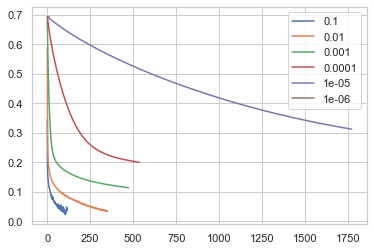

In [174]:
for i in range(len(learning_rate_inits)):
    starttime=time.time()
    j=i+1
    nnmodel=MLPClassifier(hidden_layer_sizes=(25,25),activation='relu',learning_rate_init=learning_rate_inits[i],solver='sgd',max_iter=1000000,random_state=42)
    nnmodel.fit(x_train_transform,y_train)
    endtime=time.time()
    nnmodeltrainscore=nnmodel.score(x_train_transform, y_train)
    nnmodeltestscore=nnmodel.score(x_test_transform, y_test)
    nnmodeltrainerror=1-nnmodeltrainscore
    nnmodeltesterror=1-nnmodeltestscore
    timecmplx=endtime-starttime
    loss_curve_list=nnmodel.loss_curve_
    maxiter=nnmodel.n_iter_
    iterlist4.append(maxiter)
    nnmodeltrainscorelist4.append(nnmodeltrainscore)
    nnmodeltestscorelist4.append(nnmodeltestscore)
    nnmodeltrainerrorlist4.append(nnmodeltrainerror)
    nnmodeltesterrorlist4.append(nnmodeltesterror)
    nnmodeltimecmplxlist4.append(timecmplx)
    plt.plot(loss_curve_list,label=learning_rate_inits[i])
    plt.legend(loc="upper right")
print(nnmodeltrainscorelist4)
print(nnmodeltestscorelist4)
print(nnmodeltrainerrorlist4)
print(nnmodeltesterrorlist4)
print(nnmodeltimecmplxlist4)
print(iterlist4)

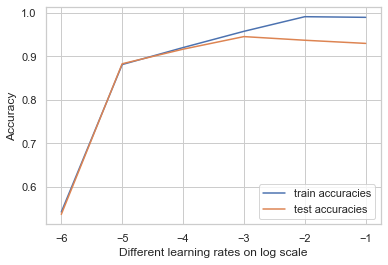

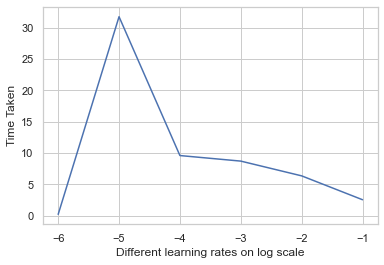

In [175]:
plt.plot(np.log10(learning_rate_inits), nnmodeltrainscorelist4,label="train accuracies")
plt.plot(np.log10(learning_rate_inits), nnmodeltestscorelist4,label="test accuracies")
plt.legend(loc="lower right")
plt.xlabel("Different learning rates on log scale")
plt.ylabel("Accuracy")
plt.show()
plt.plot(np.log10(learning_rate_inits), nnmodeltimecmplxlist4,label="time complexity")
plt.xlabel("Different learning rates on log scale")
plt.ylabel("Time Taken")
plt.show()

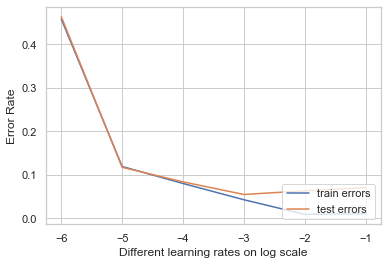

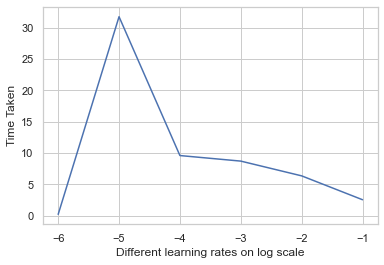

In [176]:
plt.plot(np.log10(learning_rate_inits), nnmodeltrainerrorlist4,label="train errors")
plt.plot(np.log10(learning_rate_inits), nnmodeltesterrorlist4,label="test errors")
plt.legend(loc="lower right")
plt.xlabel("Different learning rates on log scale")
plt.ylabel("Error Rate")
plt.show()
plt.plot(np.log10(learning_rate_inits), nnmodeltimecmplxlist4,label="time complexity")
plt.xlabel("Different learning rates on log scale")
plt.ylabel("Time Taken")
plt.show()

##### From above experiment we can conclude that at learning_rate_init = 0.001 model is performing better and converging faster

## Experimentation 6:

In [177]:
tols=[1e-3,1e-6,1e-9,1e-12,1e-15,1e-18,1e-21,1e-24]
nnmodeltrainscorelist5=[]
nnmodeltestscorelist5=[]
nnmodeltrainerrorlist5=[]
nnmodeltesterrorlist5=[]
nnmodeltimecmplxlist5=[]
loss_curve_list=[]
iterlist5=[]

[0.9230267449445532, 0.9877690802348337, 0.9877690802348337, 0.9877690802348337, 0.9877690802348337, 0.9877690802348337, 0.9877690802348337, 0.9877690802348337]
[0.9178082191780822, 0.9421613394216134, 0.9421613394216134, 0.9421613394216134, 0.9421613394216134, 0.9421613394216134, 0.9421613394216134, 0.9421613394216134]
[0.07697325505544683, 0.012230919765166326, 0.012230919765166326, 0.012230919765166326, 0.012230919765166326, 0.012230919765166326, 0.012230919765166326, 0.012230919765166326]
[0.0821917808219178, 0.0578386605783866, 0.0578386605783866, 0.0578386605783866, 0.0578386605783866, 0.0578386605783866, 0.0578386605783866, 0.0578386605783866]
[1.2372660636901855, 45.732654094696045, 46.3935010433197, 46.4740309715271, 46.15834712982178, 47.40518403053284, 47.50459003448486, 47.57780909538269]
[63, 2535, 2535, 2535, 2535, 2535, 2535, 2535]


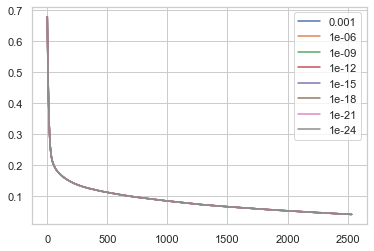

In [178]:
for i in range(len(tols)):
    starttime=time.time()
    j=i+1
    nnmodel=MLPClassifier(hidden_layer_sizes=(25,25),activation='relu',learning_rate_init=0.001,tol=tols[i],solver='sgd',max_iter=1000000,random_state=42)
    nnmodel.fit(x_train_transform,y_train)
    endtime=time.time()
    nnmodeltrainscore=nnmodel.score(x_train_transform, y_train)
    nnmodeltestscore=nnmodel.score(x_test_transform, y_test)
    nnmodeltrainerror=1-nnmodeltrainscore
    nnmodeltesterror=1-nnmodeltestscore
    timecmplx=endtime-starttime
    loss_curve_list=nnmodel.loss_curve_
    maxiter=nnmodel.n_iter_
    iterlist5.append(maxiter)
    nnmodeltrainscorelist5.append(nnmodeltrainscore)
    nnmodeltestscorelist5.append(nnmodeltestscore)
    nnmodeltrainerrorlist5.append(nnmodeltrainerror)
    nnmodeltesterrorlist5.append(nnmodeltesterror)
    nnmodeltimecmplxlist5.append(timecmplx)
    plt.plot(loss_curve_list,label=tols[i])
    plt.legend(loc="upper right")
print(nnmodeltrainscorelist5)
print(nnmodeltestscorelist5)
print(nnmodeltrainerrorlist5)
print(nnmodeltesterrorlist5)
print(nnmodeltimecmplxlist5)
print(iterlist5)

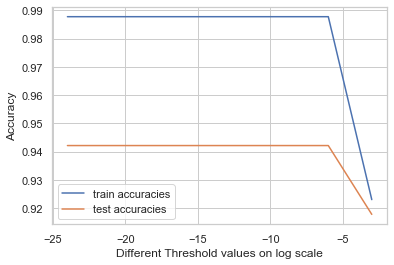

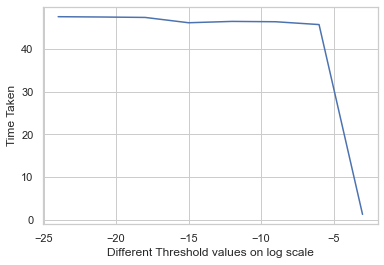

In [179]:
plt.plot(np.log10(tols), nnmodeltrainscorelist5,label="train accuracies")
plt.plot(np.log10(tols), nnmodeltestscorelist5,label="test accuracies")
plt.legend(loc="lower left")
plt.xlabel("Different Threshold values on log scale")
plt.ylabel("Accuracy")
plt.show()
plt.plot(np.log10(tols), nnmodeltimecmplxlist5,label="time complexity")
plt.xlabel("Different Threshold values on log scale")
plt.ylabel("Time Taken")
plt.show()

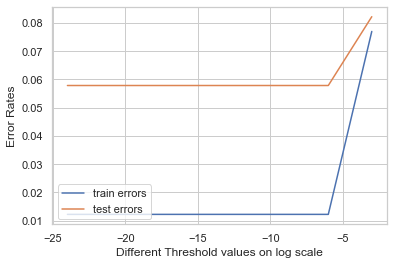

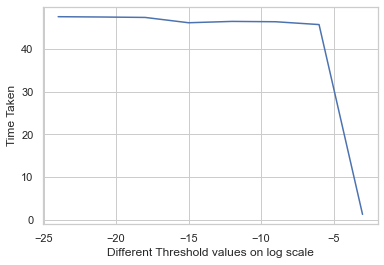

In [180]:
plt.plot(np.log10(tols), nnmodeltrainerrorlist5,label="train errors")
plt.plot(np.log10(tols), nnmodeltesterrorlist5,label="test errors")
plt.legend(loc="lower left")
plt.xlabel("Different Threshold values on log scale")
plt.ylabel("Error Rates")
plt.show()
plt.plot(np.log10(tols), nnmodeltimecmplxlist5,label="time complexity")
plt.xlabel("Different Threshold values on log scale")
plt.ylabel("Time Taken")
plt.show()

##### From above we can conclude that after tol=10-6 there is no much change in the model so we can take 1e-4 as base line value

## Optimized neural network model:

In [181]:
nnfinalmodel=MLPClassifier(hidden_layer_sizes=(25,25),activation='relu',learning_rate_init=0.001,tol=1e-4,solver='sgd',max_iter=1000000,random_state=42)
nnfinalmodel.fit(x_train_transform,y_train)
print(nnfinalmodel.score(x_train_transform,y_train))
print(nnfinalmodel.score(x_test_transform,y_test))

0.9569471624266145
0.9448249619482496


Confusion matrix, without normalization
[[1265   82]
 [  63 1218]]
Normalized confusion matrix
[[0.93912398 0.06087602]
 [0.04918033 0.95081967]]


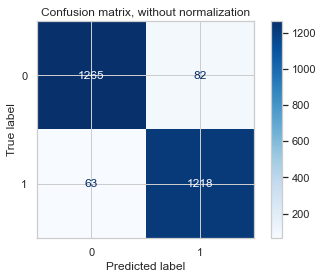

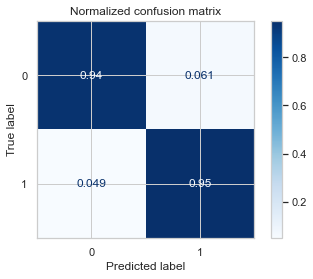

In [182]:
from sklearn.metrics import ConfusionMatrixDisplay
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        nnfinalmodel,
        x_test_transform,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [183]:
y_pred = nnfinalmodel.predict(x_test_transform) 
nnfinalmodel.score(x_test_transform, y_pred)
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9449718256721069

Text(0.5, 0, 'False Positive Rate')

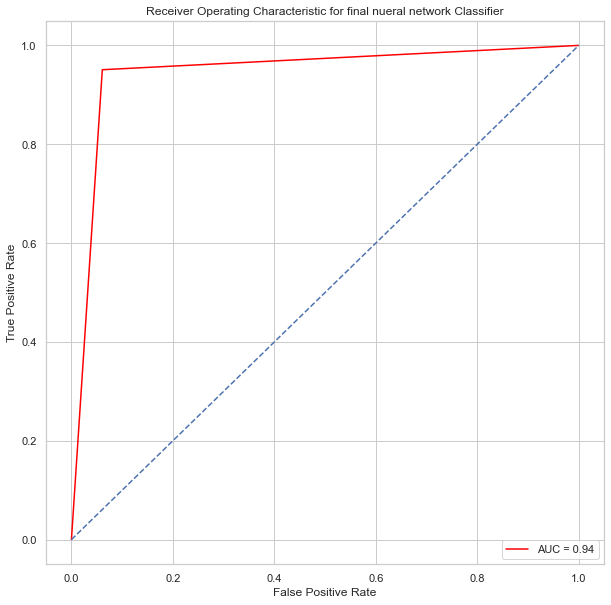

In [184]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for final nueral network Classifier')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Cross-Validation:

In [185]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_transform=sc.fit_transform(x)

In [186]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
cvs=[2,5,10,15,20,25]
crossvalidationscores=[]
for i in range(len(cvs)):
    kfold = KFold(n_splits=cvs[i], random_state=42,shuffle=True)
    model= MLPClassifier(hidden_layer_sizes=(25,25),activation='relu',learning_rate_init=0.001,tol=1e-4,solver='sgd',max_iter=1000000,random_state=42)
    results = cross_val_score(model, x_transform, y, cv=kfold)
    crossvalidationscore=np.mean(results)*100.0
    crossvalidationscores.append(crossvalidationscore)
print(crossvalidationscores)

[93.5958904109589, 94.39497716894977, 94.40639269406394, 94.47488584474884, 94.44063926940638, 94.61157509157509]


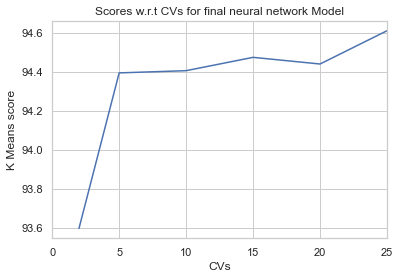

In [188]:
plt.plot(cvs,crossvalidationscores)
plt.xlabel("CVs")
plt.ylabel("K Means score")
plt.title("Scores w.r.t CVs for final neural network Model")
plt.xlim(0,25)
plt.show()

## Different Data Sizes:

In [194]:
datasplit=[1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000]
trainaccuracies=[]
trainerrors=[]
testaccuracies=[]
testerrors=[]
for i in range(len(datasplit)):
    model1 = MLPClassifier(hidden_layer_sizes=(25,25),activation='relu',learning_rate_init=0.001,tol=1e-4,solver='sgd',max_iter=1000000,random_state=42)
    model1.fit(x_train_transform[1:datasplit[i],], y_train[1:datasplit[i],])
    trainacc=(model1.score(x_train_transform[1:datasplit[i],], y_train[1:datasplit[i],]))*100
    testacc=(model1.score(x_test_transform[1:datasplit[i],], y_test[1:datasplit[i],]))*100
    trainerr=100-trainacc
    testerr=100-testacc
    trainaccuracies.append(trainacc)
    testaccuracies.append(testacc)
    trainerrors.append(trainerr)
    testerrors.append(testerr)
print(trainaccuracies,testaccuracies,trainerrors,testerrors)

[96.7967967967968, 97.2648432288192, 96.39819909954977, 96.31852741096438, 96.66555518506169, 95.59874249785652, 96.09902475618904, 96.04356523671927, 95.61912382476496, 96.03564284415349, 97.11618603100517] [91.7917917917918, 92.46164109406271, 92.99649824912456, 92.79711884753901, 92.65321659687858, 93.37647506661591, 93.83326988960792, 94.06166730110392, 94.17586600685193, 94.55652835934526, 94.93719071183861] [3.203203203203202, 2.7351567711807974, 3.601800900450229, 3.6814725890356215, 3.3344448149383084, 4.40125750214348, 3.9009752438109615, 3.9564347632807255, 4.380876175235045, 3.964357155846514, 2.8838139689948292] [8.208208208208205, 7.538358905937287, 7.003501750875444, 7.202881152460989, 7.346783403121421, 6.62352493338409, 6.166730110392081, 5.938332698896076, 5.824133993148067, 5.443471640654735, 5.0628092881613895]


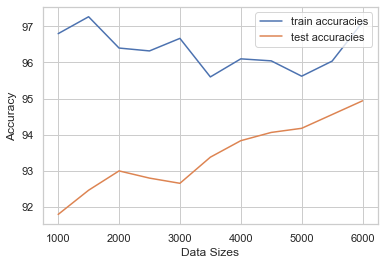

In [195]:
plt.plot(datasplit, trainaccuracies,label="train accuracies")
plt.plot(datasplit, testaccuracies,label="test accuracies")
plt.legend(loc="upper right")
plt.xlabel("Data Sizes")
plt.ylabel("Accuracy")
#plt.xlim(-1,-30)
plt.show()

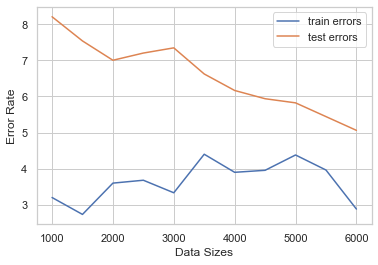

In [197]:
plt.plot(datasplit, trainerrors,label="train errors")
plt.plot(datasplit, testerrors,label="test errors")
plt.legend(loc="upper right")
plt.xlabel("Data Sizes")
plt.ylabel("Error Rate")
plt.show()